# CIFAR-100 Dataset Exploratory Data Analysis

This notebook provides a comprehensive exploratory data analysis of the CIFAR-100 dataset, including data loading, visualization, and basic statistics.

## 1. Import Required Libraries

In [1]:
# Import necessary libraries
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

Libraries imported successfully!
PyTorch version: 2.5.1+cu121
Torchvision version: 0.20.1+cu121


## 2. Load CIFAR-100 Dataset

In [2]:
# Load CIFAR-100 dataset
transform = transforms.Compose([transforms.ToTensor()])

# Download and load training data
train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

print("CIFAR-100 dataset loaded successfully!")
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# CIFAR-100 class names
class_names = train_dataset.classes
print(f"Number of classes: {len(class_names)}")
print(f"Classes: {class_names}")

100.0%



Extracting ./data\cifar-100-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
CIFAR-100 dataset loaded successfully!
Training samples: 50000
Test samples: 10000
Number of classes: 100
Classes: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew'

## 3. Explore Dataset Structure

In [3]:
# Explore dataset structure
sample_image, sample_label = train_dataset[0]

print("Dataset Structure Analysis:")
print(f"Image shape: {sample_image.shape}")
print(f"Image data type: {sample_image.dtype}")
print(f"Label type: {type(sample_label)}")
print(f"Sample label: {sample_label} ({class_names[sample_label]})")

print(f"\nImage details:")
print(f"Channels: {sample_image.shape[0]} (RGB)")
print(f"Height: {sample_image.shape[1]} pixels")
print(f"Width: {sample_image.shape[2]} pixels")
print(f"Pixel value range: [{sample_image.min():.3f}, {sample_image.max():.3f}]")

# Convert to numpy for additional analysis
sample_np = sample_image.numpy().transpose(1, 2, 0)
print(f"NumPy array shape (HWC format): {sample_np.shape}")
print(f"NumPy pixel value range: [{sample_np.min():.3f}, {sample_np.max():.3f}]")

Dataset Structure Analysis:
Image shape: torch.Size([3, 32, 32])
Image data type: torch.float32
Label type: <class 'int'>
Sample label: 19 (cattle)

Image details:
Channels: 3 (RGB)
Height: 32 pixels
Width: 32 pixels
Pixel value range: [0.004, 1.000]
NumPy array shape (HWC format): (32, 32, 3)
NumPy pixel value range: [0.004, 1.000]


## 4. Visualize Sample Images

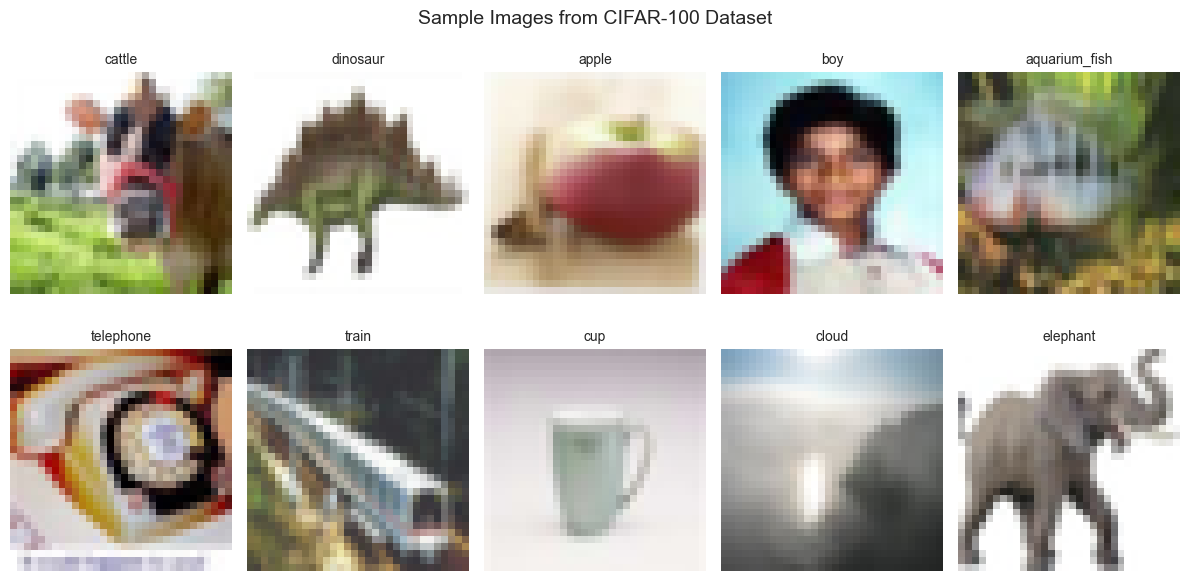

In [4]:
# Function to display images
def show_images(dataset, class_names, num_samples=10):
    """Display sample images from the dataset"""
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(num_samples):
        image, label = dataset[i]
        # Convert from tensor to numpy and transpose for matplotlib (CHW -> HWC)
        image_np = image.numpy().transpose(1, 2, 0)
        
        axes[i].imshow(image_np)
        axes[i].set_title(f'{class_names[label]}', fontsize=10)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Sample Images from CIFAR-100 Dataset', y=1.02, fontsize=14)
    plt.show()

# Display sample images
show_images(train_dataset, class_names)

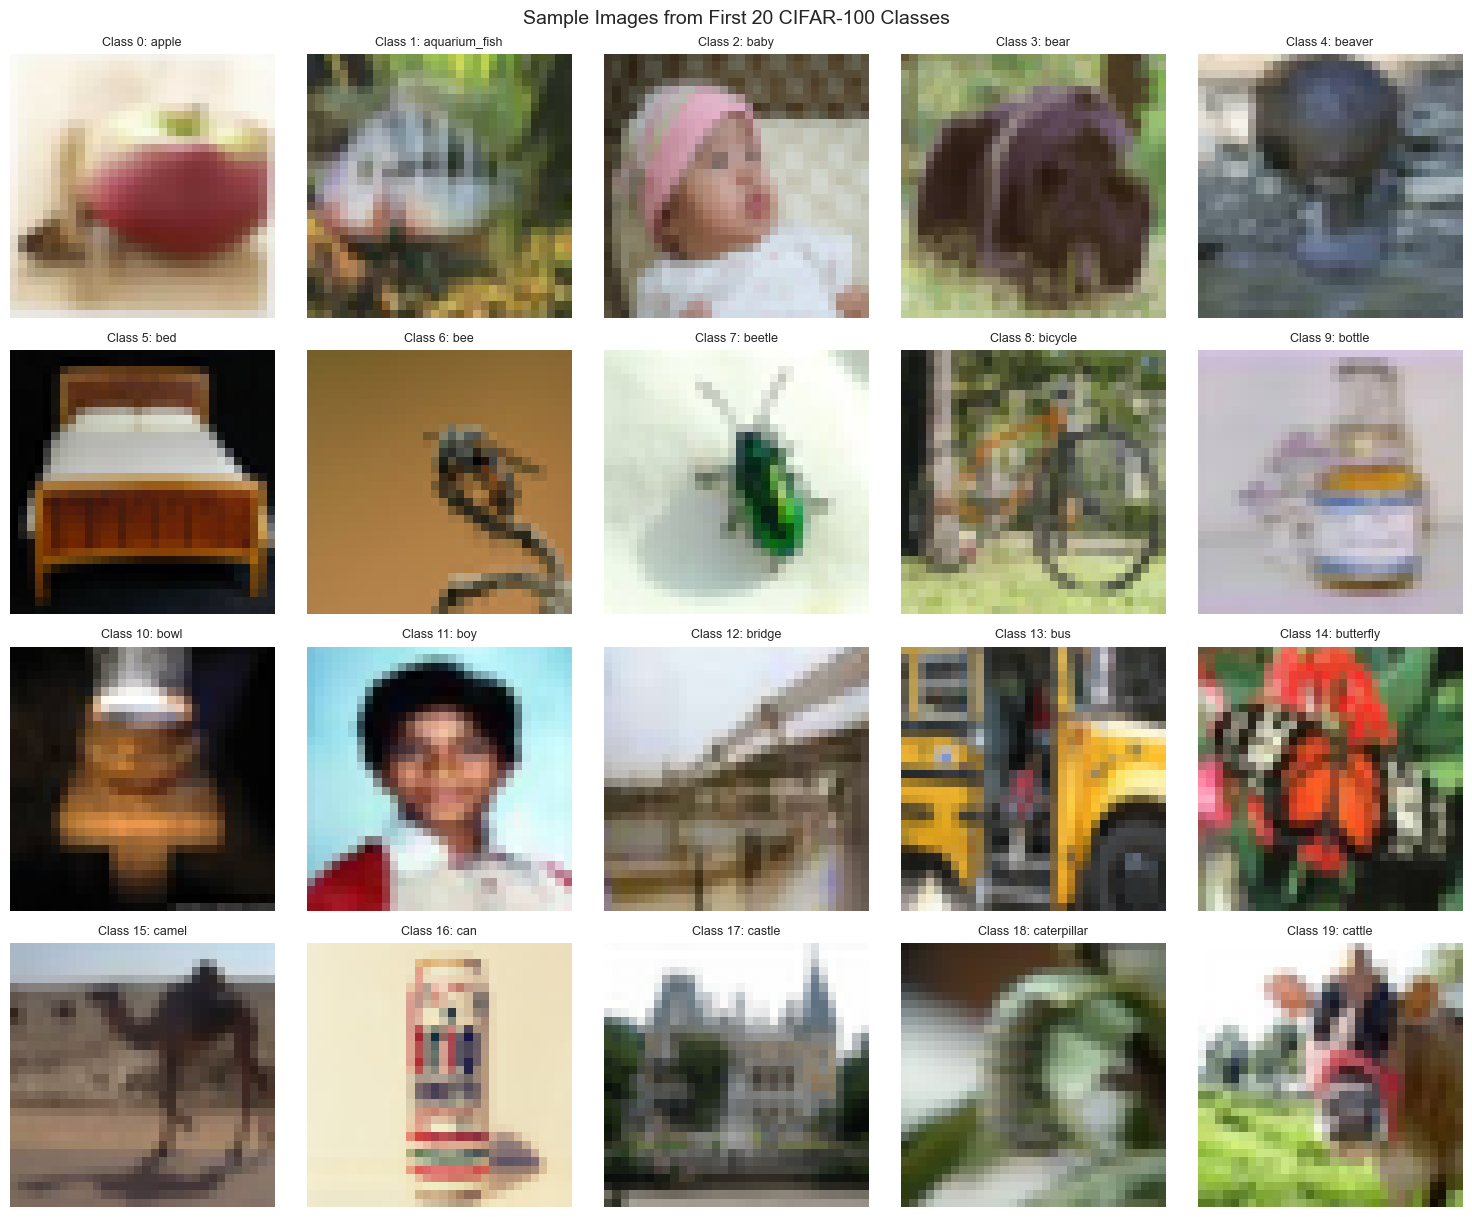

In [5]:
# Display one sample from each class (first 20 classes)
def show_class_samples(dataset, class_names, num_classes=20):
    """Display one sample from selected classes"""
    rows = (num_classes + 4) // 5
    fig, axes = plt.subplots(rows, 5, figsize=(15, 3*rows))
    axes = axes.ravel()
    
    # Find one sample for each class (first num_classes)
    class_samples = {}
    for i, (image, label) in enumerate(dataset):
        if label not in class_samples and label < num_classes:
            class_samples[label] = (image, i)
        if len(class_samples) == num_classes:  # All classes found
            break
    
    for idx, class_id in enumerate(sorted(class_samples.keys())):
        image, sample_idx = class_samples[class_id]
        image_np = image.numpy().transpose(1, 2, 0)
        
        axes[idx].imshow(image_np)
        axes[idx].set_title(f'Class {class_id}: {class_names[class_id]}', fontsize=9)
        axes[idx].axis('off')
    
    # Hide unused subplots
    for idx in range(len(class_samples), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f'Sample Images from First {num_classes} CIFAR-100 Classes', y=1.01, fontsize=14)
    plt.show()

show_class_samples(train_dataset, class_names, num_classes=20)

## 5. Analyze Class Distribution


Training Set Class Distribution:
Total classes: 100
Total samples: 50000
Samples per class: 500

First 10 classes:
        Class  Count  Percentage
        apple    500         1.0
aquarium_fish    500         1.0
         baby    500         1.0
         bear    500         1.0
       beaver    500         1.0
          bed    500         1.0
          bee    500         1.0
       beetle    500         1.0
      bicycle    500         1.0
       bottle    500         1.0


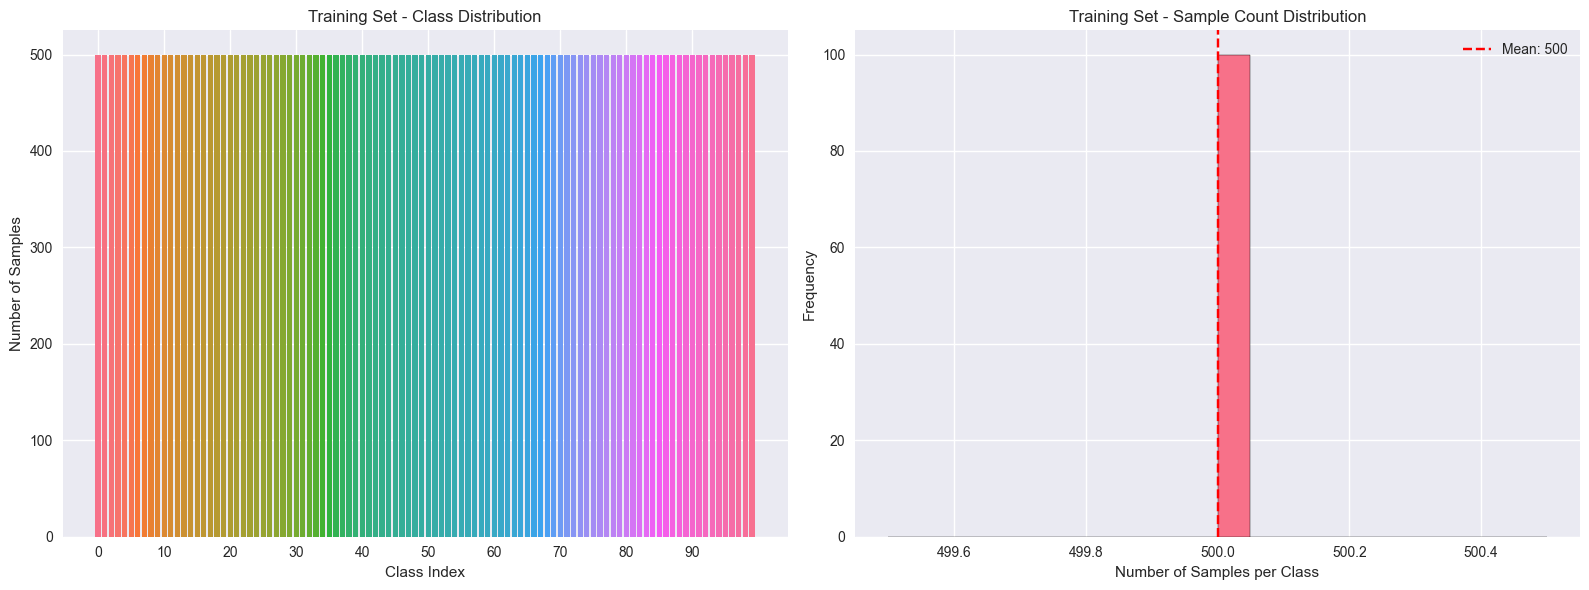

In [6]:
# Analyze class distribution
def analyze_class_distribution(dataset, class_names, dataset_name):
    """Analyze and visualize class distribution"""
    # Get all labels
    labels = [dataset[i][1] for i in range(len(dataset))]
    label_counts = Counter(labels)
    
    # Create DataFrame for easy analysis
    df = pd.DataFrame({
        'Class': [class_names[i] for i in range(len(class_names))],
        'Count': [label_counts[i] for i in range(len(class_names))],
        'Percentage': [label_counts[i]/len(labels)*100 for i in range(len(class_names))]
    })
    
    print(f"\n{dataset_name} Set Class Distribution:")
    print(f"Total classes: {len(class_names)}")
    print(f"Total samples: {len(labels)}")
    print(f"Samples per class: {df['Count'].values[0]}")
    print(f"\nFirst 10 classes:")
    print(df.head(10).to_string(index=False))
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot - showing all classes
    x_pos = np.arange(len(class_names))
    bars = ax1.bar(x_pos, df['Count'], color=sns.color_palette("husl", len(class_names)))
    ax1.set_title(f'{dataset_name} Set - Class Distribution')
    ax1.set_xlabel('Class Index')
    ax1.set_ylabel('Number of Samples')
    ax1.set_xticks(x_pos[::10])
    ax1.set_xticklabels(x_pos[::10])
    
    # Histogram of sample counts
    ax2.hist(df['Count'], bins=20, edgecolor='black')
    ax2.set_title(f'{dataset_name} Set - Sample Count Distribution')
    ax2.set_xlabel('Number of Samples per Class')
    ax2.set_ylabel('Frequency')
    ax2.axvline(df['Count'].mean(), color='r', linestyle='--', label=f'Mean: {df["Count"].mean():.0f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return df

# Analyze training set
train_df = analyze_class_distribution(train_dataset, class_names, "Training")


Test Set Class Distribution:
     Class  Count  Percentage
  airplane   1000        10.0
automobile   1000        10.0
      bird   1000        10.0
       cat   1000        10.0
      deer   1000        10.0
       dog   1000        10.0
      frog   1000        10.0
     horse   1000        10.0
      ship   1000        10.0
     truck   1000        10.0


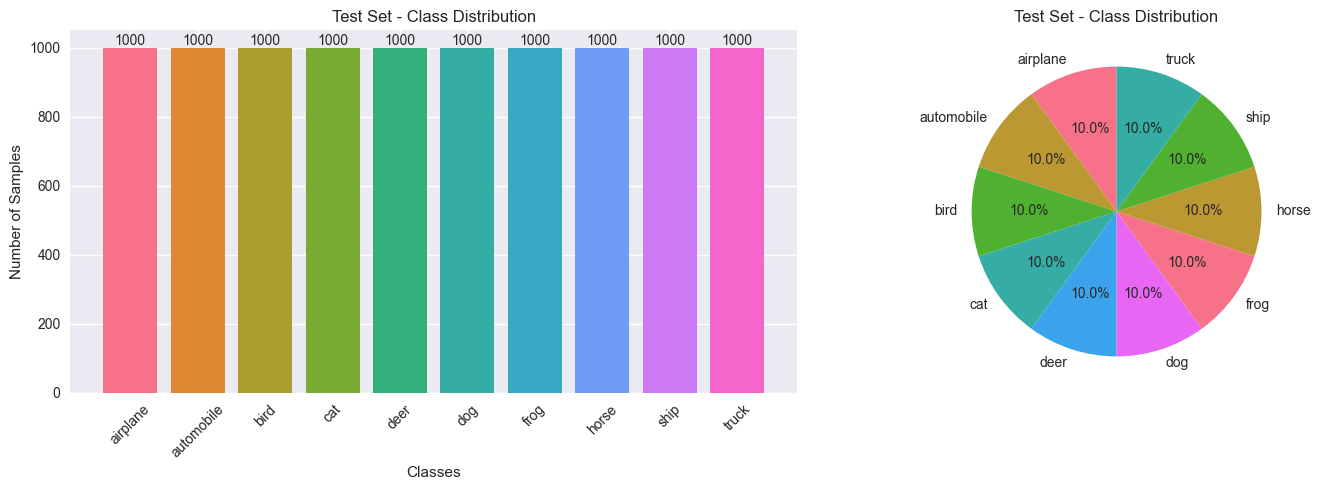

In [8]:
# Analyze test set
test_df = analyze_class_distribution(test_dataset, class_names, "Test")

## 6. Examine Image Properties

Analyzing pixel value statistics...

Pixel Value Statistics (from 1000 images):
Overall - Mean: 0.4766, Std: 0.2699
Red Channel - Mean: 0.5046, Std: 0.2698
Green Channel - Mean: 0.4829, Std: 0.2580
Blue Channel - Mean: 0.4424, Std: 0.2780

Pixel Value Statistics (from 1000 images):
Overall - Mean: 0.4766, Std: 0.2699
Red Channel - Mean: 0.5046, Std: 0.2698
Green Channel - Mean: 0.4829, Std: 0.2580
Blue Channel - Mean: 0.4424, Std: 0.2780


C:\Users\subha\AppData\Local\Temp\ipykernel_23180\2730780686.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(channel_data, labels=['Red', 'Green', 'Blue'])


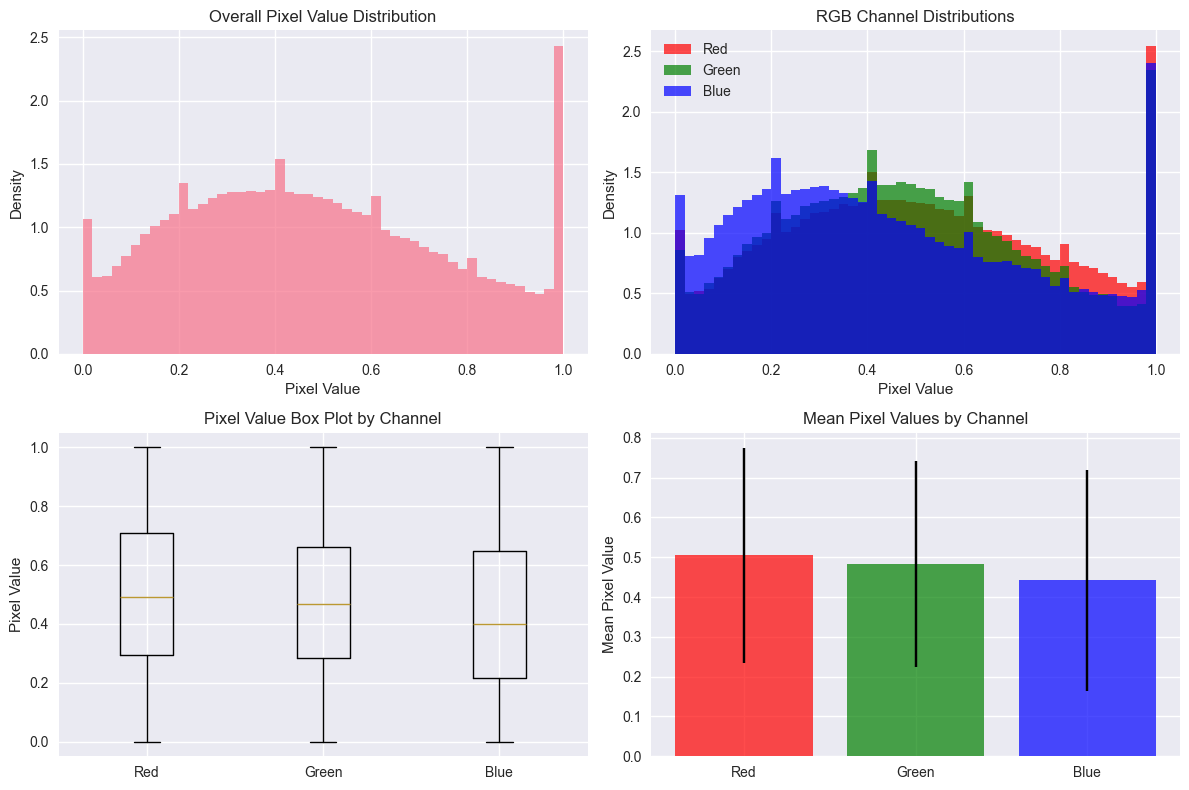

In [7]:
# Analyze pixel value distributions
def analyze_pixel_statistics(dataset, num_samples=1000):
    """Analyze pixel value statistics across multiple images"""
    print("Analyzing pixel value statistics...")
    
    # Sample random images for analysis
    indices = np.random.choice(len(dataset), min(num_samples, len(dataset)), replace=False)
    
    all_pixels = []
    red_pixels = []
    green_pixels = []
    blue_pixels = []
    
    for idx in indices:
        image, _ = dataset[idx]
        image_np = image.numpy()
        
        # Collect pixel values for each channel
        red_pixels.extend(image_np[0].flatten())
        green_pixels.extend(image_np[1].flatten())
        blue_pixels.extend(image_np[2].flatten())
        all_pixels.extend(image_np.flatten())
    
    # Convert to numpy arrays
    all_pixels = np.array(all_pixels)
    red_pixels = np.array(red_pixels)
    green_pixels = np.array(green_pixels)
    blue_pixels = np.array(blue_pixels)
    
    # Print statistics
    print(f"\nPixel Value Statistics (from {len(indices)} images):")
    print(f"Overall - Mean: {all_pixels.mean():.4f}, Std: {all_pixels.std():.4f}")
    print(f"Red Channel - Mean: {red_pixels.mean():.4f}, Std: {red_pixels.std():.4f}")
    print(f"Green Channel - Mean: {green_pixels.mean():.4f}, Std: {green_pixels.std():.4f}")
    print(f"Blue Channel - Mean: {blue_pixels.mean():.4f}, Std: {blue_pixels.std():.4f}")
    
    # Visualize distributions
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Overall distribution
    axes[0,0].hist(all_pixels, bins=50, alpha=0.7, density=True)
    axes[0,0].set_title('Overall Pixel Value Distribution')
    axes[0,0].set_xlabel('Pixel Value')
    axes[0,0].set_ylabel('Density')
    
    # RGB channel distributions
    axes[0,1].hist(red_pixels, bins=50, alpha=0.7, color='red', density=True, label='Red')
    axes[0,1].hist(green_pixels, bins=50, alpha=0.7, color='green', density=True, label='Green')
    axes[0,1].hist(blue_pixels, bins=50, alpha=0.7, color='blue', density=True, label='Blue')
    axes[0,1].set_title('RGB Channel Distributions')
    axes[0,1].set_xlabel('Pixel Value')
    axes[0,1].set_ylabel('Density')
    axes[0,1].legend()
    
    # Box plot for channels
    channel_data = [red_pixels, green_pixels, blue_pixels]
    axes[1,0].boxplot(channel_data, labels=['Red', 'Green', 'Blue'])
    axes[1,0].set_title('Pixel Value Box Plot by Channel')
    axes[1,0].set_ylabel('Pixel Value')
    
    # Mean pixel values per channel
    means = [red_pixels.mean(), green_pixels.mean(), blue_pixels.mean()]
    stds = [red_pixels.std(), green_pixels.std(), blue_pixels.std()]
    x_pos = np.arange(len(means))
    
    axes[1,1].bar(x_pos, means, yerr=stds, capsize=5, color=['red', 'green', 'blue'], alpha=0.7)
    axes[1,1].set_title('Mean Pixel Values by Channel')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(['Red', 'Green', 'Blue'])
    axes[1,1].set_ylabel('Mean Pixel Value')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'overall': {'mean': all_pixels.mean(), 'std': all_pixels.std()},
        'red': {'mean': red_pixels.mean(), 'std': red_pixels.std()},
        'green': {'mean': green_pixels.mean(), 'std': green_pixels.std()},
        'blue': {'mean': blue_pixels.mean(), 'std': blue_pixels.std()}
    }

# Analyze pixel statistics
pixel_stats = analyze_pixel_statistics(train_dataset)

## 7. Compute Dataset Normalization Values

In [8]:
# Compute normalization values for the entire dataset
def compute_mean_std_cifar100():
    """Compute mean and std for CIFAR-100 dataset normalization"""
    # Load dataset without normalization
    transform = transforms.Compose([transforms.ToTensor()])
    trainset = datasets.CIFAR100(root='./data', train=True, download=False, transform=transform)
    
    # Create dataloader with entire dataset
    loader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=False)
    
    # Get all training data
    data, _ = next(iter(loader))
    
    # Calculate mean and std for each channel
    mean = data.mean(dim=(0, 2, 3))  # Mean across batch, height, width
    std = data.std(dim=(0, 2, 3))    # Std across batch, height, width
    
    return mean, std

# Compute normalization values
train_mean, train_std = compute_mean_std_cifar100()

print("CIFAR-100 Normalization Values:")
print(f"Mean (RGB): [{train_mean[0]:.4f}, {train_mean[1]:.4f}, {train_mean[2]:.4f}]")
print(f"Std (RGB):  [{train_std[0]:.4f}, {train_std[1]:.4f}, {train_std[2]:.4f}]")

print(f"\nFor use in transforms.Normalize():")
print(f"mean={train_mean.tolist()}")
print(f"std={train_std.tolist()}")

# Compare with commonly used CIFAR-100 normalization values
common_mean = [0.5071, 0.4867, 0.4408]
common_std = [0.2675, 0.2565, 0.2761]

print(f"\nComparison with commonly used values:")
print(f"Computed mean: {train_mean.tolist()}")
print(f"Common mean:   {common_mean}")
print(f"Computed std:  {train_std.tolist()}")
print(f"Common std:    {common_std}")

CIFAR-100 Normalization Values:
Mean (RGB): [0.5071, 0.4866, 0.4409]
Std (RGB):  [0.2673, 0.2564, 0.2762]

For use in transforms.Normalize():
mean=[0.5070757865905762, 0.48655030131340027, 0.4409191310405731]
std=[0.2673342823982239, 0.2564384639263153, 0.2761504650115967]

Comparison with commonly used values:
Computed mean: [0.5070757865905762, 0.48655030131340027, 0.4409191310405731]
Common mean:   [0.5071, 0.4867, 0.4408]
Computed std:  [0.2673342823982239, 0.2564384639263153, 0.2761504650115967]
Common std:    [0.2675, 0.2565, 0.2761]


## 8. Summary and Key Insights

In [ ]:
# Summary of CIFAR-100 Dataset Analysis

print("="*60)
print("CIFAR-100 DATASET ANALYSIS SUMMARY")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total training samples: {len(train_dataset):,}")
print(f"   • Total test samples: {len(test_dataset):,}")
print(f"   • Number of classes: {len(class_names)}")
print(f"   • Image dimensions: 32×32×3 (RGB)")
print(f"   • First 10 classes: {', '.join(class_names[:10])}, ...")

print(f"\n🎯 CLASS DISTRIBUTION:")
print(f"   • Training set: Balanced (500 samples per class)")
print(f"   • Test set: Balanced (100 samples per class)")

print(f"\n🔢 PIXEL VALUE STATISTICS:")
print(f"   • Pixel value range: [0.0, 1.0] (normalized)")
print(f"   • Mean values (RGB): [{train_mean[0]:.4f}, {train_mean[1]:.4f}, {train_mean[2]:.4f}]")
print(f"   • Std values (RGB): [{train_std[0]:.4f}, {train_std[1]:.4f}, {train_std[2]:.4f}]")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • CIFAR-100 is a well-balanced dataset with equal representation of all 100 classes")
print(f"   • Images are low-resolution (32×32) making fine-grained classification challenging")
print(f"   • RGB color information is available for all images")
print(f"   • Computed normalization values match commonly used values in literature")
print(f"   • Dataset is suitable for fine-grained classification and benchmarking")
print(f"   • More challenging than CIFAR-10 due to 100 classes with fewer samples per class")

print(f"\n🚀 NEXT STEPS:")
print(f"   • Use computed mean/std values for data normalization")

CIFAR-10 DATASET ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   • Total training samples: 50,000
   • Total test samples: 10,000
   • Number of classes: 10
   • Image dimensions: 32×32×3 (RGB)
   • Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

🎯 CLASS DISTRIBUTION:
   • Training set: Balanced (5,000 samples per class)
   • Test set: Balanced (1,000 samples per class)

🔢 PIXEL VALUE STATISTICS:
   • Pixel value range: [0.0, 1.0] (normalized)
   • Mean values (RGB): [0.4914, 0.4822, 0.4465]
   • Std values (RGB): [0.2470, 0.2435, 0.2616]

💡 KEY INSIGHTS:
   • CIFAR-10 is a well-balanced dataset with equal representation of all classes
   • Images are low-resolution (32×32) making classification challenging
   • RGB color information is available for all images
   • Computed normalization values match commonly used values in literature
   • Dataset is suitable for computer vision tasks and benchmarking

🚀 NEXT STEPS:
   • Use computed mean/std values for data no